In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import scipy.stats
import matplotlib.ticker as ticker
from tqdm import tqdm
import warnings
# warnings.filterwarnings("ignore")
from trade import BackTest
ins = BackTest('res/all_ew/all_ew', 'strategy/strategy_all_ew.xlsx',0)

In [2]:
md = 9.5055/(1+.08)
p = 114.181
md_h = 9.8703/(1+.08)
h = 119.792
n=100000
-p*md/h/md_h*n


-91793.22741122654

In [4]:
dy = 0.1/100
p*md*dy*n

100495.1384722222

In [32]:
fv=100
ttm= 18
freq = 2
ytm = 10/100
coupon = 9.5/100
tenor = np.arange(1,ttm*freq+1)
pvCoupon = ((ytm/freq+1)**(-tenor)).sum()*(fv*coupon/freq)
pv =(ytm/freq+1)**(-ttm*freq)*fv+pvCoupon
pv

95.86328707310743

In [2]:
# # 合并不同文件到一起
# tmpD = pd.DataFrame()
# for listName in os.listdir('data/tmp'):
#     for file in os.listdir(f'data/tmp/{listName}'):
#         if file[-4:] == '.csv':
#             tmpD = tmpD.append(pd.read_csv(f'data/tmp/{listName}/{file}'))
# # tmpD.sort_values('Enddt').to_csv('data/index_weight_data.csv',index = False)

In [4]:
tmpD.columns=['code', 'date', 'open', 'high', 'low', 'close', 'volume', 'value',
       'return']

In [6]:
tmpD.sort_values('date').to_csv('data/index.csv',index = False)

In [7]:
# forward = pd.read_csv('data/forward_data.csv')
# forward['Symbol']=forward['Symbol'].astype(str).str.rjust(6,'0')

# # 前复权open price
# openPF = forward.pivot(index='TradingDate',columns='Symbol',values='OpenPrice')
# openPF.columns = openPF.columns.astype(str).str.rjust(6,'0')
# openPF.to_csv('data/openPF.csv')


# # 前复权日流通市值
# cValueF = forward.pivot(index='TradingDate',columns='Symbol',values='CirculatedMarketValue')
# cValueF.to_csv('data/cValueF.csv')

# #########################################################################

# stkTrade = pd.read_csv('data/stk_trade_data.csv')
# stkTrade['Stkcd']=stkTrade['Stkcd'].astype(str).str.rjust(6,'0')

# # 日流通市值
# cValue = stkTrade.pivot(index='Trddt',columns='Stkcd',values='Dsmvosd')
# cValue.to_csv('data/cValue.csv')

# # 日开盘价
# openP = stkTrade.pivot(index='Trddt',columns='Stkcd',values='Opnprc')
# openP.to_csv('data/openP.csv')

# # 期货开盘价
# data = pd.read_csv('data/stock_index_future.csv')
# futureOpen = data.pivot(index='Trddt',columns='Agmtcd',values='Opnprc')

In [3]:
data = pd.read_csv('data/stock_index_future.csv')
indexWeight = pd.read_csv('data/index_weight_data.csv')
indexWeight.set_index('Enddt',inplace=True)
weight300 = indexWeight[indexWeight['Indexcd'] == 300]

In [4]:
date = '2011-01-04'
month = '2010-12'

In [5]:
data = pd.read_csv('data/stock_index_future.csv')
indexData = pd.read_csv('data/index_weight_data.csv')
indexData.set_index('Enddt',inplace=True)
cir = pd.read_csv('data/circulating.csv')
stkCir = cir.pivot(index='Trdmnt',columns='Stkcd',values = 'Msmvosd')

# indexDay['cir'].sum()

In [6]:
def get_last_month(date):
    y = date[:4]
    m = int(date[5:7])-1
    if m==0:
        m=12
        y=str(int(y)-1)
    m=str(m).rjust(2,'0')
    return y+'-'+m

In [7]:
get_last_month('2020-01-01')

'2019-12'

In [8]:
def get_index_weight(date):
    month = get_last_month(date)
    indexDay = pd.merge(indexData.loc[date],stkCir.loc[month,],left_on='Stkcd',right_index=True)
    indexDay=indexDay[['Indexcd','Stkcd','Indcd','Weight',month]]
    indexDay.columns = ['index','code','ind','weight','cir']

    # 500和300的权重
    indexMkt = indexDay.groupby('index').sum()['cir']
    indexMkt = indexMkt/indexMkt.sum()
    # indexMkt.index =
    return indexMkt

In [9]:
get_index_weight('2022-01-04')

index
300    0.782508
905    0.217492
Name: cir, dtype: float64

In [65]:


# 把指数权重分到个股上
indexDay.loc[indexDay['index'] ==300,'weight'] = indexDay.loc[indexDay['index'] ==300,'weight'] * indexMkt[300]
indexDay.loc[indexDay['index'] ==905,'weight'] = indexDay.loc[indexDay['index'] ==905,'weight'] * indexMkt[905]

In [66]:
# 行业weight
indWeight = indexDay.groupby('ind').sum()['weight']/100


In [6]:
# ## 移仓换月分析

# data = pd.read_csv('data/stock_index_future.csv')
# data = data[data['Agmtcd'].str.slice(0,2)=='IC'] # 只看IF
# maturity = data[['Agmtcd','Deldt']].drop_duplicates() # 合约到期时间
# volume = data.pivot(index='Trddt',columns='Agmtcd',values='volume')

# max_volume = volume.apply(lambda x:get_max(x),axis=1) # 主力合约
# def get_max(se):
#     return pd.Series({'maxVolume':se.max(),'code':se.index[se.argmax()]})
# max_volume['max_prop' ]= max_volume['maxVolume']/volume.sum(axis=1)
# last_day = max_volume.drop_duplicates('code',keep='last')
# last_day.reset_index(inplace=True)

# res  = pd.merge(last_day,maturity,left_on='code',right_on = 'Agmtcd').set_index('code')
# res.columns = ['mainUntil','maxVolume','maxProp','code','maturity']


# gap = pd.to_datetime(res['maturity']) - pd.to_datetime(res['mainUntil'])
# gap.dt.days.describe().round(2)

# max_volume['max_prop'].describe().round(2)

In [44]:
'''得到空头仓位'''
# 读期货合约信息
data = pd.read_csv('data/future_basics.csv')
futureContract = data[['Symbol','LastTradingDate','TradingFee','ShortTradingMargin','ContractMultiple']].drop_duplicates()
# 限定时间区间
futureContract=futureContract[futureContract['LastTradingDate']<='2022-07-30']
futureContract=futureContract[futureContract['LastTradingDate']>='2011-01-01']
# 只选IC和IF
msk1= futureContract['Symbol'].str.startswith('IF')
msk2= futureContract['Symbol'].str.startswith('IC')


IFContract = futureContract[msk1].copy()
ICContract = futureContract[msk2].copy()



# 确定移仓换月日期
timeline = list(pd.read_csv('data/futureOpen.csv')['Trddt'])
def get_days_ago(date,t=3):
    return timeline[timeline.index(date)-t]
IFContract['changeDate']=IFContract['LastTradingDate'].apply(lambda x:get_days_ago(x))
# shift换仓日期和target合约匹配
IFContract.sort_values('changeDate',inplace=True)
IFContract['changeDate']=IFContract['changeDate'].shift(1)
# # 补充开仓日期
IFContract.iloc[0,5] = ins.start



ICContract['changeDate']=ICContract['LastTradingDate'].apply(lambda x:get_days_ago(x))
# shift换仓日期和target合约匹配
ICContract.sort_values('changeDate',inplace=True)
ICContract['changeDate']=ICContract['changeDate'].shift(1)
# 不做第一个合约
ICContract = ICContract.iloc[1:]


# # 储存策略
# IFContract.set_index('changeDate',inplace = True)
# IFContract[['Symbol','TradingFee','ShortTradingMargin','ContractMultiple']].to_csv('strategy/future_position.csv')


In [25]:
'''得到空头仓位'''
# 读期货合约信息
data = pd.read_csv('data/future_basics.csv')
futureContract = data[['Symbol','LastTradingDate','TradingFee','ShortTradingMargin','ContractMultiple']].drop_duplicates()
# 限定时间区间
futureContract=futureContract[futureContract['LastTradingDate']<='2022-07-30']
futureContract=futureContract[futureContract['LastTradingDate']>='2011-01-01']
# 只选IC和IF
msk1= futureContract['Symbol'].str.startswith('IF')
msk2= futureContract['Symbol'].str.startswith('IC')
futureContract = futureContract[msk1+msk2].copy()



# 确定移仓换月日期
timeline = list(pd.read_csv('data/futureOpen.csv')['Trddt'])
def get_days_ago(date,t=3):
    return timeline[timeline.index(date)-t]
futureContract['changeDate']=futureContract['LastTradingDate'].apply(lambda x:get_days_ago(x))
# shift换仓日期和target合约匹配
futureContract.sort_values('changeDate',inplace=True)
futureContract = futureContract.sort_values('Symbol')[1:].drop_duplicates('changeDate').sort_values('changeDate')
futureContract['changeDate']=futureContract['changeDate'].shift(1)
# # 补充开仓日期
futureContract.iloc[0,5] = ins.start

# 储存策略
futureContract.set_index('changeDate',inplace = True)
futureContract[['Symbol','TradingFee','ShortTradingMargin','ContractMultiple']].to_csv('strategy/future_position_500.csv')
futureContract


,Symbol,LastTradingDate,TradingFee,ShortTradingMargin,ContractMultiple
changeDate,,,,,
2011-01-04,IF1101,2011-01-21,0.000050,0.15,300
2011-01-18,IF1102,2011-02-18,0.000050,0.15,300
2011-02-15,IF1103,2011-03-18,0.000050,0.15,300
2011-03-15,IF1104,2011-04-15,0.000050,0.15,300
2011-04-12,IF1105,2011-05-20,0.000050,0.15,300
...,...,...,...,...,...
2022-02-15,IC2203,2022-03-18,0.000023,0.14,200
2022-03-15,IC2204,2022-04-15,0.000023,0.14,200
2022-04-12,IC2205,2022-05-20,0.000023,0.14,200


In [26]:
'''得到空头仓位'''
# 读期货合约信息
data = pd.read_csv('data/future_basics.csv')
futureContract = data[['Symbol','LastTradingDate','TradingFee','ShortTradingMargin','ContractMultiple']].drop_duplicates()
# 限定时间区间
futureContract=futureContract[futureContract['LastTradingDate']<='2022-07-30']
futureContract=futureContract[futureContract['LastTradingDate']>='2011-01-01']
# 只选IC和IF
msk1= futureContract['Symbol'].str.startswith('IF')
msk2= futureContract['Symbol'].str.startswith('IC')
futureContract = futureContract[msk1].copy()



# 确定移仓换月日期
timeline = list(pd.read_csv('data/futureOpen.csv')['Trddt'])
def get_days_ago(date,t=3):
    return timeline[timeline.index(date)-t]
futureContract['changeDate']=futureContract['LastTradingDate'].apply(lambda x:get_days_ago(x))
# shift换仓日期和target合约匹配
futureContract.sort_values('changeDate',inplace=True)
# futureContract = futureContract.sort_values('Symbol')[1:].drop_duplicates('changeDate').sort_values('changeDate')
futureContract['changeDate']=futureContract['changeDate'].shift(1)
# # 补充开仓日期
futureContract.iloc[0,5] = ins.start

# 储存策略
futureContract.set_index('changeDate',inplace = True)
futureContract[['Symbol','TradingFee','ShortTradingMargin','ContractMultiple']].to_csv('strategy/future_position_300.csv')
futureContract


,Symbol,LastTradingDate,TradingFee,ShortTradingMargin,ContractMultiple
changeDate,,,,,
2011-01-04,IF1101,2011-01-21,0.000050,0.15,300
2011-01-18,IF1102,2011-02-18,0.000050,0.15,300
2011-02-15,IF1103,2011-03-18,0.000050,0.15,300
2011-03-15,IF1104,2011-04-15,0.000050,0.15,300
2011-04-12,IF1105,2011-05-20,0.000050,0.15,300
...,...,...,...,...,...
2022-02-15,IF2203,2022-03-18,0.000023,0.12,300
2022-03-15,IF2204,2022-04-15,0.000023,0.12,300
2022-04-12,IF2205,2022-05-20,0.000023,0.12,300


In [53]:
futureInfo = IFContract.append(ICContract).set_index('changeDate').sort_index()

In [117]:
tryList = []
for date,series in futureInfo.groupby('changeDate'):
    tryList.append(get_index_weight(date).iloc[0])


{'whiskers': [<matplotlib.lines.Line2D at 0x25037a4af10>,
 'caps': [<matplotlib.lines.Line2D at 0x250379e15b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25037a4abe0>],
 'medians': [<matplotlib.lines.Line2D at 0x250379e1cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x250379ed0a0>],
 'means': []}

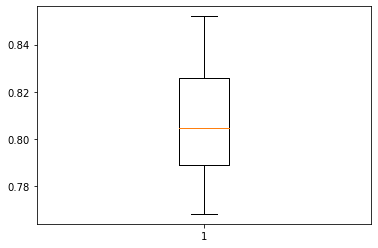

In [123]:
plt.boxplot(np.array(tryList))

In [110]:
index

index
300    0.787018
905    0.212982
Name: cir, dtype: float64

In [113]:
series.loc[series['Symbol'].str.startswith('IF'),'weight'] = 

,Symbol,LastTradingDate,TradingFee,ShortTradingMargin,ContractMultiple
changeDate,,,,,
2022-06-14,IF2207,2022-07-15,0.000023,0.12,300


In [61]:
# 移仓换月分析

data = pd.read_csv('data/stock_index_future.csv')
data = data[data['Agmtcd'].str.slice(0,2)=='IC'] # 只看IF
maturity = data[['Agmtcd','Deldt']].drop_duplicates() # 合约到期时间
volume = data.pivot(index='Trddt',columns='Agmtcd',values='volume')

def get_max(se):
    return pd.Series({'maxVolume':se.max(),'code':se.index[se.argmax()]})

max_volume = volume.apply(lambda x:get_max(x),axis=1) # 主力合约

max_volume['max_prop' ]= max_volume['maxVolume']/volume.sum(axis=1)
last_day = max_volume.drop_duplicates('code',keep='last')
last_day.reset_index(inplace=True)

res  = pd.merge(last_day,maturity,left_on='code',right_on = 'Agmtcd').set_index('code')
res.columns = ['mainUntil','maxVolume','maxProp','code','maturity']


gap = pd.to_datetime(res['maturity']) - pd.to_datetime(res['mainUntil'])
gap.dt.days.describe().round(2)

max_volume['max_prop'].describe().round(2)

count    1841.00
mean        0.73
std         0.13
min         0.34
25%         0.64
50%         0.74
75%         0.84
max         0.97
Name: max_prop, dtype: float64